In [2]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm



In [54]:
df=pd.read_excel('C:\JyotiLearnings\GitDemo\MachineLearning_loanApprovalPredictionSystemUsingPython\loan.xlsx')


In [55]:
#Explore dataset
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [57]:
df.describe()
df['ApplicantIncome'] = df['ApplicantIncome'].astype(int) 
df.isnull().sum() #find missing values- total number of missing data

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [58]:

#lets understand how credit history affects loan status for each of applicant
pd.crosstab(df['Credit_History'],df['Loan_Status'],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


<AxesSubplot:>

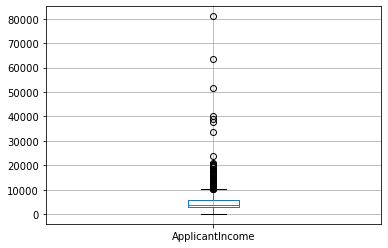

In [59]:

df.boxplot(column='ApplicantIncome')


There are lot of outliers for Applicant Income
moving forward we have to handle these outliers for better data analysis and prediction.
create histogram for this ApplicantIncome variable



<AxesSubplot:>

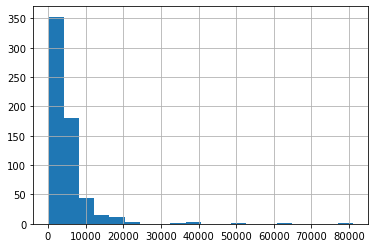

In [60]:
df['ApplicantIncome'].hist(bins=20)

we can see its right skewed histohram. we have to normalize values.

<AxesSubplot:>

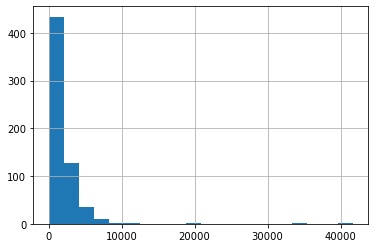

In [61]:
df['CoapplicantIncome'].hist(bins=20)

we can see its right skewed histohram. we have to normalize values.

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

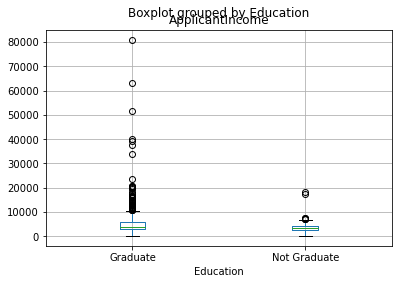

In [62]:
# understand relationship between applicant's income and education 

df.boxplot(column='ApplicantIncome',by='Education')

median salary is not much varying than someone who is graduate. but some applicants who are graduate have much higher salary than non graduates.which is obvious but we normalize an scaling it.

<AxesSubplot:>

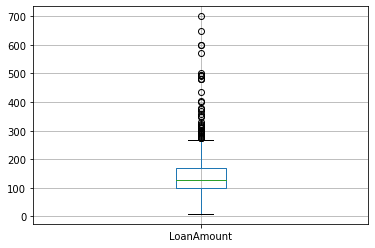

In [63]:
df.boxplot(column='LoanAmount')

<AxesSubplot:>

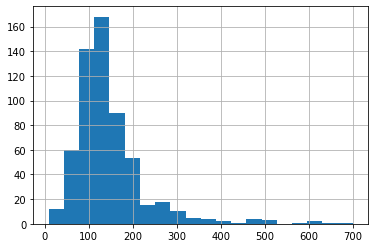

In [64]:
df['LoanAmount'].hist(bins=20)

this is also skewed righside   

<AxesSubplot:>

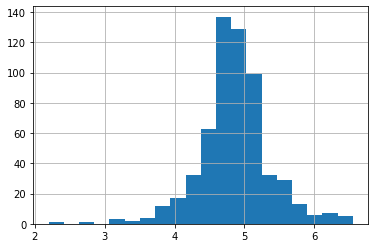

In [65]:
# to normalize we apply log function
df['LoanAmount_log']=np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

plot is more normalized now

<AxesSubplot:>

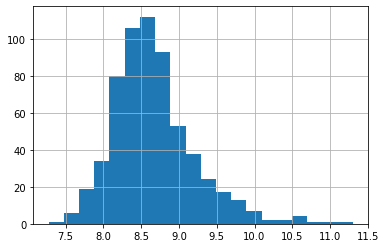

In [66]:
df['Total_Income']=df['ApplicantIncome']+df['CoapplicantIncome'] 
df['Total_Income']=np.log(df['Total_Income']) #find natual log
df['Total_Income'].hist(bins=20)

In [67]:
# now find null values that exist in dataset variables

In [68]:

df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
Total_Income          0
dtype: int64

In [69]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
Total_Income          0
dtype: int64

In [70]:
# fill null values in respective columns

df['Gender'].fillna(df['Gender'].mode()[0],inplace=True) 
# mode value will be used to fill missing values in categorical variable. it will find mode of values that are null. and mode value obtained will be placed in missing values. inplace function will replace mode value of variable in places where values are missing

df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

df.LoanAmount=df.LoanAmount.fillna(df.LoanAmount.mean())
df.LoanAmount_log=df.LoanAmount_log.fillna(df.LoanAmount_log.mean())
# above two are not categorical data so we calculate mean value and mean will be used to replace null values.

df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)


# check are there still any missing values
df.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
Total_Income         0
dtype: int64

In [71]:
# find percentage missing gender

print("per of missing gender is %2f%%" %((df['Gender'].isnull().sum()/df.shape[0])*100))

per of missing gender is 0.000000%


number of perople who take loan as group by gender:
Male      502
Female    112
Name: Gender, dtype: int64


<AxesSubplot:xlabel='Gender', ylabel='count'>

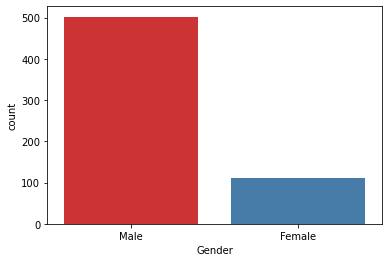

In [72]:
## find number of perople who take loan as group by gender
print("number of perople who take loan as group by gender:")
print(df['Gender'].value_counts())
sns.countplot(x='Gender',data=df,palette='Set1')

number of perople who take loan as group by Marital_Status:
Yes    401
No     213
Name: Married, dtype: int64


<AxesSubplot:xlabel='Married', ylabel='count'>

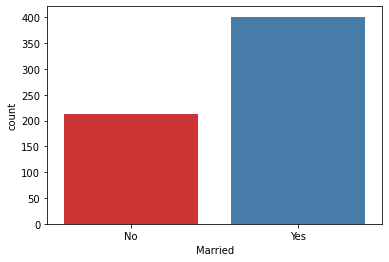

In [73]:
## find number of perople who take loan as group by Marital_Status
print("number of perople who take loan as group by Marital_Status:")
print(df['Married'].value_counts())
sns.countplot(x='Married',data=df,palette='Set1')

number of perople who take loan as group by dependents:
0.0    360
1.0    102
2.0    101
3+      51
Name: Dependents, dtype: int64


<AxesSubplot:xlabel='Dependents', ylabel='count'>

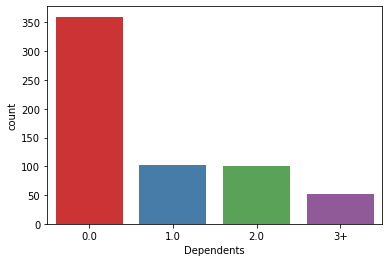

In [74]:
## find number of perople who take loan as group by dependents
print("number of perople who take loan as group by dependents:")
print(df['Dependents'].value_counts())
sns.countplot(x='Dependents',data=df,palette='Set1')

number of perople who take loan as group by Self_Employed:
No     532
Yes     82
Name: Self_Employed, dtype: int64


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

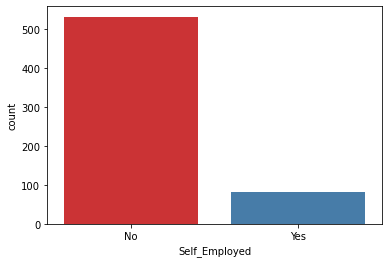

In [75]:
## find number of perople who take loan as group by Self_Employed
print("number of perople who take loan as group by Self_Employed:")
print(df['Self_Employed'].value_counts())
sns.countplot(x='Self_Employed',data=df,palette='Set1')

number of perople who take loan as group by LoanAmount:
146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: LoanAmount, Length: 204, dtype: int64


<AxesSubplot:xlabel='LoanAmount', ylabel='count'>

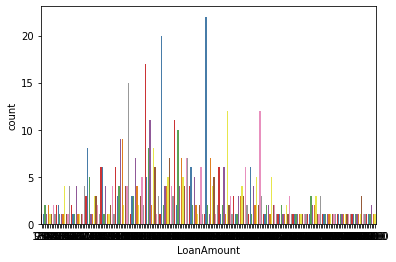

In [76]:
## find number of perople who take loan as group by LoanAmount
print("number of perople who take loan as group by LoanAmount:")
print(df['LoanAmount'].value_counts())
sns.countplot(x='LoanAmount',data=df,palette='Set1')

number of perople who take loan as group by Credithistory:
1.0    525
0.0     89
Name: Credit_History, dtype: int64


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

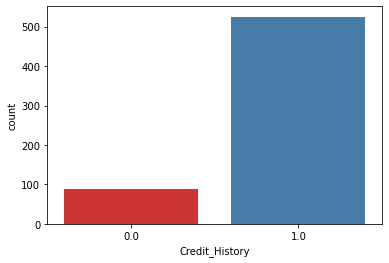

In [77]:
## find number of perople who take loan as group by Credithistory
print("number of perople who take loan as group by Credithistory:")
print(df['Credit_History'].value_counts())
sns.countplot(x='Credit_History',data=df,palette='Set1')

In [78]:
# After normalization and handling missing values we have to divide dataset into dependant and independant variable
# independent variables store into x
# dependant variable that we are supposed to predict that loan eligibility status
X=df.iloc[:,np.r_[1:5,9:11,13:15]].values 
y=df.iloc[:,12].values
X
y
# After normalization and handling missing values we have to divide dataset into dependant and independant variable
# independent variables store into x
# now split dataset into train and test dataset  use train_test_split
# import scikit learn library from training and testing

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0) 
# split in 80:20 % ) 20 for testing, 80 fro trainign
# we dont want to results to change in every cycle. so random state to 0. accuracy and result every time code is run remain same then
#X variables will have independent variables 
# y will have dependant
print(X_train)  # it has some categorical values so we have to convert it to 0, 1 s so that system can understand so we use Label Encoder


[['Male' 'Yes' 0.0 ... 1.0 4.875197323201151 8.675563527387679]
 ['Male' 'No' 1.0 ... 1.0 5.278114659230517 9.328123407632566]
 ['Male' 'Yes' 0.0 ... 0.0 5.003946305945459 8.644882552557126]
 ...
 ['Male' 'Yes' '3+' ... 1.0 5.298317366548036 9.0280988119824]
 ['Male' 'Yes' 0.0 ... 1.0 5.075173815233827 8.704999678440762]
 ['Female' 'Yes' 0.0 ... 1.0 5.204006687076795 8.777401286867264]]


In [79]:
# label encoder will convert text male female, yes no  text into numerical format

from sklearn.preprocessing import LabelEncoder
Labelencoder_X=LabelEncoder() # we created instance of labelEncoder 
# use for loop to apply it on each of index which we want to convert text to numeric format
for i in range(0,5): 
    X_train[:,i]= X_train[:,i].astype(str)
    X_train[:,i]= Labelencoder_X.fit_transform(X_train[:,i])
    X_train[:,7]= X_train[:,7].astype(str)
    X_train[:,7]= Labelencoder_X.fit_transform(X_train[:,7])
X_train
# apply it on y as well

Labelencoder_y=LabelEncoder()
y_train=Labelencoder_y.fit_transform(y_train)
y_train        # Training is done

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [80]:
for i in range(0,5):
    X_test[:,i]= X_test[:,i].astype(str)
    X_test[:,i]= Labelencoder_X.fit_transform(X_test[:,i])
    X_test[:,7]= X_test[:,7].astype(str)
    X_test[:,7]= Labelencoder_X.fit_transform(X_test[:,7])
X_train

Labelencoder_y=LabelEncoder()
y_test=Labelencoder_y.fit_transform(y_test)
y_test  

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [81]:
# now sclae dataset as we have different data with different range so scaling is important. 
#Analysis  and prediction is much better 

from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)



In [121]:
# now apply algorithms and see how accurately it predicts outcome
from sklearn.tree import DecisionTreeClassifier
DTClassifier=DecisionTreeClassifier() # create instance of DecisionTreee
# provide training dataset to alogithm
DTClassifier.fit(X_train,y_train)
y_pred=DTClassifier.predict(X_test) # use algorithm to predict values of test dataset
y_pred
# find how well prediction is by finding accuracy
from sklearn import metrics
print("Accuracy of Decision Tree Classifier is",metrics.accuracy_score(y_pred,y_test))


Accuracy of Decision Tree Classifier is 0.6178861788617886


In [139]:

from sklearn.naive_bayes import GaussianNB
NBClassifier=GaussianNB()
NBClassifier.fit(X_train,y_train)
y_pred=NBClassifier.predict(X_test)
y_pred
print("Accuracy of Naive Bayes Classifier is",metrics.accuracy_score(y_pred,y_test))


Accuracy of Naive Bayes Classifier is 0.8292682926829268


In [140]:

from sklearn.ensemble import RandomForestClassifier
RFClassifier=RandomForestClassifier()
RFClassifier.fit(X_train,y_train)
y_pred=RFClassifier.predict(X_test)
y_pred
print("Accuracy of RandomForestClassifier is",metrics.accuracy_score(y_pred,y_test))


Accuracy of RandomForestClassifier is 0.7398373983739838


In [141]:
from sklearn.neighbors import KNeighborsClassifier
KNClassifier=KNeighborsClassifier()
KNClassifier.fit(X_train,y_train)
y_pred=KNClassifier.predict(X_test)
print("Accuracy of KNeighbors Classifier is",metrics.accuracy_score(y_pred,y_test))
y_pred


Accuracy of KNeighbors Classifier is 0.7804878048780488


array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [142]:
# now test data is to be import which is without prediction

testdata=pd.read_excel('C:\JyotiLearnings\GitDemo\MachineLearning_loanApprovalPredictionSystemUsingPython\loan - Copy.xlsx')

In [143]:
# explore the data
testdata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [144]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [145]:
testdata.isnull().sum() # to know which variable have missing values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
dtype: int64

In [146]:
# fill null values in respective columns

testdata['Gender'].fillna(testdata['Gender'].mode()[0],inplace=True) 
# mode value will be used to fill missing values in categorical variable. it will find mode of values that are null. and mode value obtained will be placed in missing values. inplace function will replace mode value of variable in places where values are missing

testdata['Married'].fillna(testdata['Married'].mode()[0],inplace=True)
testdata['Dependents'].fillna(testdata['Dependents'].mode()[0],inplace=True)
testdata['Self_Employed'].fillna(testdata['Self_Employed'].mode()[0],inplace=True)
testdata['Loan_Amount_Term'].fillna(testdata['Loan_Amount_Term'].mode()[0],inplace=True)
testdata['Credit_History'].fillna(testdata['Credit_History'].mode()[0],inplace=True)
# check are there still any missing values
testdata.isnull().sum()


Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

<AxesSubplot:>

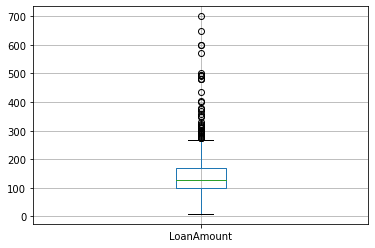

In [147]:
#loan amount is still having null values. first explore it with box plot to see a lot of outliers

testdata.boxplot(column='LoanAmount')



There are outliers


<AxesSubplot:>

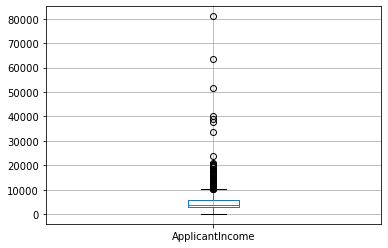

In [148]:
testdata.boxplot(column='ApplicantIncome')

In [149]:

testdata.LoanAmount=testdata.LoanAmount.fillna(testdata.LoanAmount.mean())
testdata['LoanAmount_log']=np.log(testdata['LoanAmount'])
#check for null values
testdata.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
LoanAmount_log       0
dtype: int64

In [150]:
#There are no null values so form total income column in our dataset which is sum of applicantincome and coapplicant income

testdata['Total_Income']=testdata['ApplicantIncome']+testdata['CoapplicantIncome'] 
testdata['Total_Income_log']=np.log(testdata['Total_Income']) #find natual log
# now look at our data
testdata.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,Total_Income,Total_Income_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,4.986426,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,4.948760,6000.0,8.699515


In [151]:

# select data that we need into variable
test=testdata.iloc[:,np.r_[1:5,9:11,13:15]].values

In [152]:
# categorical to numerical
for i in range(0,5): 
    test[:,i]= test[:,i].astype(str)
    test[:,i]= Labelencoder_X.fit_transform(test[:,i])
    test[:,7]= test[:,7].astype(str)
test[:,7]= Labelencoder_X.fit_transform(test[:,7])
test


array([[1, 0, 0, ..., 1.0, 5849.0, 334],
       [1, 1, 1, ..., 1.0, 6091.0, 347],
       [1, 1, 0, ..., 1.0, 3000.0, 56],
       ...,
       [1, 1, 1, ..., 1.0, 8312.0, 450],
       [1, 1, 2, ..., 1.0, 7583.0, 430],
       [0, 0, 0, ..., 0.0, 4583.0, 199]], dtype=object)

In [153]:
# scale data
test=ss.fit_transform(test)

In [162]:
#NBClassifier.fit(X_train,y_train)
pred=NBClassifier.predict(test)
pred



array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,